## 1. Load Data & Basic Overview
First, we load the dataset and inspect its structure. This helps us understand the dimensions and data types we are working with.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('dataset-train-vf.csv')
test = pd.read_csv('dataset-test-vf.csv')

# Display shape and basic info
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")
print("\n--- Data Types ---")
print(train.info())

# Show first few rows
display(train.head())

Train Shape: (4480, 13)
Test Shape: (792, 12)

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4480 non-null   int64  
 1   f1      2642 non-null   float64
 2   f2      4480 non-null   int64  
 3   f3      3096 non-null   float64
 4   f4      4480 non-null   float64
 5   f5      4480 non-null   float64
 6   f6      4480 non-null   int64  
 7   f7      4480 non-null   float64
 8   f8      4480 non-null   float64
 9   f9      4480 non-null   int64  
 10  f10     568 non-null    float64
 11  f11     4480 non-null   object 
 12  y       4480 non-null   object 
dtypes: float64(7), int64(4), object(2)
memory usage: 455.1+ KB
None


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,1,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,NaN,C1,square
1,2,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,NaN,C2,square
2,3,0.000729,1449,196.3,0.841,0.172727,795,0.420000,0.112528,16240,NaN,C2,square
3,4,0.043499,24702,349.7,0.594,5.254545,9570,7.160000,2.417831,239680,0.430355,C3,circle
4,5,0.000972,1104,162.5,0.792,0.109091,570,0.320000,0.066930,12040,NaN,C3,square


## 2. Missing Values Analysis
We need to identify columns with missing data. As observed, columns like f1, f3, and especially f10 have a significant number of nulls. This will guide our imputation strategy later.

--- Missing Values Summary ---
     Missing Count  Percentage (%)
f10           3912       87.321429
f1            1838       41.026786
f3            1384       30.892857


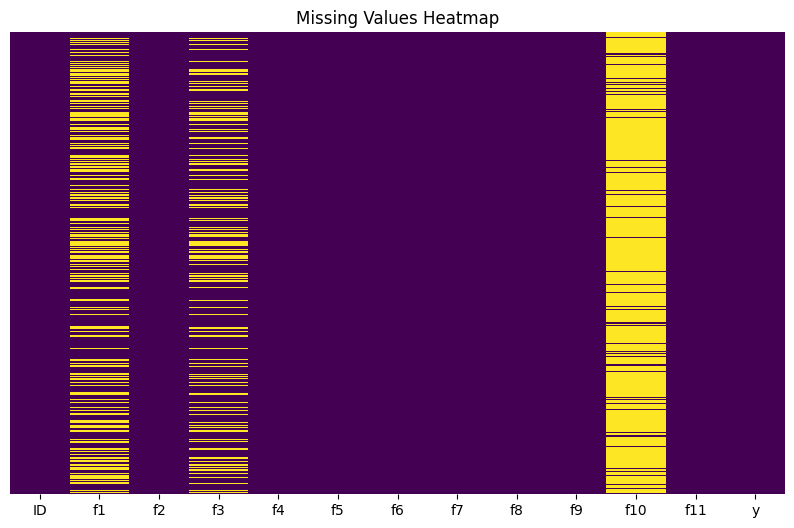

In [9]:
# Calculate missing values
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(train)) * 100

# Create a DataFrame for report
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_percent})
print("--- Missing Values Summary ---")
print(missing_df)

# Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## 3. Target Distribution (Class Imbalance)
Checking the distribution of the target variable y is critical. We expect an imbalanced dataset where 'square' is the majority and 'circle' is the minority.

--- Target Distribution ---
y
square    4181
circle     299
Name: count, dtype: int64

--- Target Percentage ---
y
square    93.325893
circle     6.674107
Name: proportion, dtype: float64


C:\Users\Zord\AppData\Local\Temp\ipykernel_81548\1572075843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=train, palette='pastel')


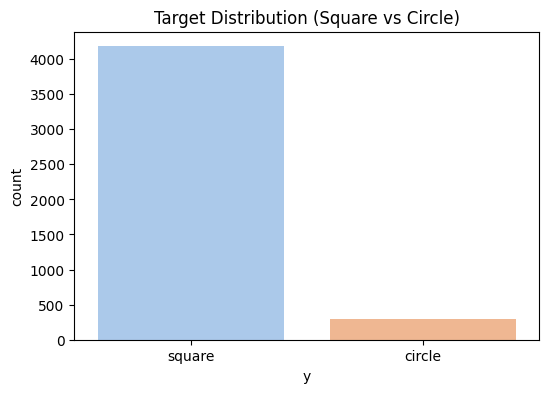

In [14]:
# Check target distribution
target_counts = train['y'].value_counts()
target_percent = train['y'].value_counts(normalize=True) * 100

print("--- Target Distribution ---")
print(target_counts)
print("\n--- Target Percentage ---")
print(target_percent)

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=train, palette='pastel')
plt.title('Target Distribution (Square vs Circle)')
plt.show()

## 4. Categorical Feature Analysis (f11)
We inspect the categorical feature f11 to see its unique values and distribution.

--- f11 Unique Values ---
['C1' 'C2' 'C3' 'C4']

--- f11 Distribution ---
f11
C3    1152
C2    1133
C1    1110
C4    1085
Name: count, dtype: int64


C:\Users\Zord\AppData\Local\Temp\ipykernel_81548\4009770956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='f11', data=train, palette='Set2')


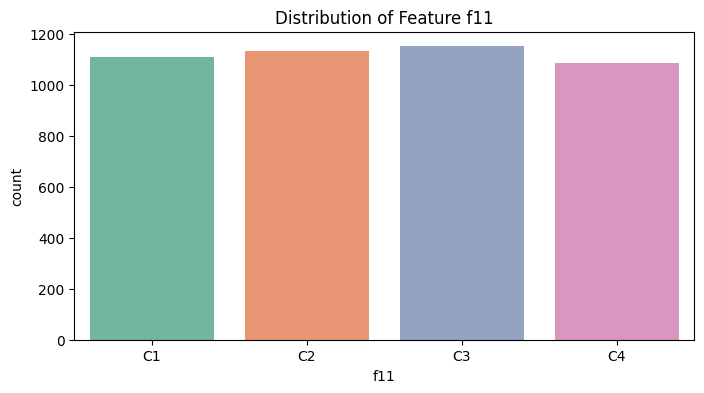

In [18]:
# Analyze Categorical Feature 'f11'
print("--- f11 Unique Values ---")
print(train['f11'].unique())

print("\n--- f11 Distribution ---")
print(train['f11'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x='f11', data=train, palette='Set2')
plt.title('Distribution of Feature f11')
plt.show()

## 5. Numerical Features Statistics
Summary statistics give us insight into the scale, mean, and standard deviation of numerical features. This helps in deciding whether scaling (Normalization/Standardization) is needed.

In [29]:
# Summary statistics for numerical columns
# Exclude ID as it is not a feature
num_cols = train.select_dtypes(include=[np.number]).columns.drop('ID')
print("--- Numerical Features Statistics ---")
display(train[num_cols].describe().T)

--- Numerical Features Statistics ---


,count,mean,std,min,25%,50%,75%,max
f1,2642.0,0.007127,0.009138,0.000081,0.001397,0.003321,0.008586,4.471446e-02
f2,4480.0,25597.162054,94005.638440,161.000000,2783.000000,7590.000000,22701.000000,3.311839e+06
f3,3096.0,234.375598,106.207714,35.750000,170.300000,218.075000,271.050000,6.500000e+02
f4,4480.0,0.786005,0.163220,0.062000,0.681000,0.802500,0.920000,1.000000e+00
f5,4480.0,3.162125,10.189312,0.009091,0.400000,1.004545,2.581818,2.553909e+02
f6,4480.0,10897.995536,25574.563533,105.000000,1530.000000,3885.000000,11070.000000,6.423150e+05
f7,4480.0,7.419467,27.248011,0.046667,0.806667,2.200000,6.580000,9.599533e+02
f8,4480.0,1.804952,5.978266,0.006204,0.252502,0.600454,1.471806,1.606886e+02
f9,4480.0,257523.437500,773903.649296,1960.000000,31360.000000,84000.000000,241920.000000,2.339190e+07
f10,568.0,0.506391,0.289980,0.000224,0.251716,0.490897,0.759281,9.998563e-01


## 2. Feature Engineering & Preprocessing

In this step, we clean the data, create new features based on domain insights, and prepare the dataset for effective model training.

### Key Actions

- **Imputation**  
  Missing values in `f1` and `f3` are imputed using the **median** to reduce the impact of outliers.  
  Feature `f10` is dropped due to having more than **80% missing values**.

- **New Feature Creation (Ratios)**  
  Interaction features are created based on domain intuition, as ratios often capture stronger signals than raw values:
  - `f1 / f6`
  - `f5 / f6`
  - `f5 / f9`

- **Target Encoding**  
  The target variable is explicitly encoded to correctly handle class imbalance:
  - `Square → 0`
  - `Circle → 1`

- **Feature Scaling**  
  `StandardScaler` is applied to numerical features to normalize their distributions and help the model converge faster during training.


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Handling Missing Values & Feature Selection
# Drop 'f10' due to high missing percentage (>87%)
# Drop 'ID' as it's not a feature
cols_to_drop = ['ID', 'f10']
train_clean = train.drop(columns=cols_to_drop)
test_clean = test.drop(columns=cols_to_drop)

# Impute f1 and f3 with Median (robust to outliers)
imputer = SimpleImputer(strategy='median')
train_clean[['f1', 'f3']] = imputer.fit_transform(train_clean[['f1', 'f3']])
test_clean[['f1', 'f3']] = imputer.transform(test_clean[['f1', 'f3']])

# 2. Feature Creation (Engineering)
# Based on analysis, ratios between features often provide better separation
def create_ratios(df):
    df = df.copy()
    # Adding small epsilon to avoid division by zero if any
    df['ratio_f1_f6'] = df['f1'] / (df['f6'] + 1e-6)
    df['ratio_f5_f6'] = df['f5'] / (df['f6'] + 1e-6)
    df['ratio_f5_f9'] = df['f5'] / (df['f9'] + 1e-6)
    return df

train_eng = create_ratios(train_clean)
test_eng = create_ratios(test_clean)

# 3. Categorical Encoding (Target & Features)
# Critical: Manual mapping for Target to ensure Circle (Minority) is 1
target_map = {'square': 0, 'circle': 1}
train_eng['target'] = train_eng['y'].map(target_map)

# Verify mapping
print("Target Mapping Check:")
print(train_eng[['y', 'target']].value_counts())

# Drop original 'y' after encoding
X = train_eng.drop(columns=['y', 'target'])
y = train_eng['target']

# Encode Categorical Feature 'f11' (One-Hot Encoding)
X = pd.get_dummies(X, columns=['f11'], drop_first=True)

# Align Test set (ensure same columns)
test_eng = pd.get_dummies(test_eng, columns=['f11'], drop_first=True)
# Add missing columns to test if any (align columns)
test_eng = test_eng.reindex(columns=X.columns, fill_value=0)

# 4. Scaling Numerical Features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_scaled = pd.DataFrame(scaler.transform(test_eng), columns=test_eng.columns)

print("\n--- Final Processed Data Shape ---")
print(f"Train Features: {X_scaled.shape}")
print(f"Test Features: {test_scaled.shape}")

# Display first few rows of processed data
display(X_scaled.head())

Target Mapping Check:
y       target
square  0         4181
circle  1          299
Name: count, dtype: int64

--- Final Processed Data Shape ---
Train Features: (4480, 15)
Test Features: (792, 15)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,ratio_f1_f6,ratio_f5_f6,ratio_f5_f9,f11_C2,f11_C3,f11_C4
0,-0.309073,0.390795,-0.127146,-0.232872,0.165224,0.762835,0.390795,0.167740,0.524228,-0.517430,-1.110960,-1.052238,-0.581818,-0.588348,-0.565321
1,-0.309073,-0.225833,-0.127146,0.441140,-0.205081,-0.330560,-0.225833,-0.182676,-0.268931,-0.049286,1.558523,1.687109,1.718751,-0.588348,-0.565321
2,-0.666052,-0.256909,-0.372920,0.336974,-0.293418,-0.395085,-0.256909,-0.283128,-0.311809,-0.214685,-0.557692,-0.418853,1.718751,-0.588348,-0.565321
3,5.224112,-0.009523,1.358502,-1.176488,0.205377,-0.051932,-0.009523,0.102529,-0.023059,1.145141,2.612645,1.728358,-0.581818,1.699673,-0.565321
4,-0.632586,-0.260579,-0.754420,0.036733,-0.299664,-0.403884,-0.260579,-0.290756,-0.317237,0.080761,-0.804971,-0.718510,-0.581818,1.699673,-0.565321


## 4. Dealing with Imbalanced Data (SMOTE)

The target variable is highly imbalanced, with approximately **93% Square** and **7% Circle** samples. Training a model directly on this distribution would likely cause it to be biased toward the majority class (**Square**) and perform poorly on the minority class.

To address this issue, we apply **SMOTE (Synthetic Minority Over-sampling Technique)**.

### Strategy

- **Synthetic Oversampling**  
  SMOTE generates new synthetic samples for the minority class (**Circle**) by interpolating between existing minority instances in feature space.  
  This helps the model learn a more balanced decision boundary.

### Crucial Step (Avoiding Data Leakage)

- **Train–Validation Split First**  
  The dataset is split into **training** and **validation** sets *before* applying SMOTE.

- **Oversample Training Data Only**  
  SMOTE is applied **only to the training set**.  
  The validation set remains untouched, containing only real, unseen samples. This ensures a fair evaluation and prevents data leakage.


In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Split Data into Train and Validation Sets
# We use a stratified split to ensure the proportion of classes remains the same in both sets initially
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("--- Shapes Before SMOTE ---")
print(f"Train set: {X_train.shape}, Class distribution:\n{y_train.value_counts()}")
print(f"Val set:   {X_val.shape}, Class distribution:\n{y_val.value_counts()}")

# 2. Apply SMOTE (Only on Training Data)
# This creates synthetic 'Circle' examples to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- Shapes After SMOTE ---")
print(f"Resampled Train set: {X_train_resampled.shape}")
print(f"Resampled Class distribution:\n{y_train_resampled.value_counts()}")

# Now we have a balanced training set (Square=Circle) ready for modeling.
# The Validation set (X_val, y_val) remains untouched and imbalanced (as in real life).

--- Shapes Before SMOTE ---
Train set: (3584, 15), Class distribution:
target
0    3345
1     239
Name: count, dtype: int64
Val set:   (896, 15), Class distribution:
target
0    836
1     60
Name: count, dtype: int64

--- Shapes After SMOTE ---
Resampled Train set: (6690, 15)
Resampled Class distribution:
target
0    3345
1    3345
Name: count, dtype: int64


C:\Users\Zord\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## 5. Model 1: Logistic Regression (Linear Classifier)

We start with Logistic Regression. It serves as a strong baseline for binary classification.

### 1. Evaluation Measures & Justification

Since our dataset is highly imbalanced (Square ≈ 93%, Circle ≈ 7%), standard Accuracy is dangerous (a model that predicts "Square" for everyone gets 93% accuracy but fails the task).

We will focus on the following metrics:

- **F1-Score (Minority Class - Circle): (Main Metric)**  
  It combines Precision and Recall. We want to maximize this to ensure we detect Circles correctly without too many false alarms.

- **Recall (Sensitivity)**  
  Important because missing a "Circle" (Minority) is usually worse than checking a Square.

- **ROC-AUC**  
  To measure the model's ability to rank positive instances higher than negative ones.

### 2. Hyper-parameter Tuning Strategy

We use GridSearchCV to find the best settings:

- **C (Regularization)**  
  Controls the penalty strength. Smaller values prevent overfitting.

- **solver**  
  Different algorithms for optimization (liblinear is good for small/medium binary datasets).

- **Metric**  
  We explicitly optimize for `scoring='f1'` to force the search to pick the best model for the Circle class.


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

# 1. Define the Parameter Grid
# We test different regularization strengths (C) and solvers
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # From strong to weak regularization
    'solver': ['liblinear', 'lbfgs']      # Solvers compatible with l2 penalty
}

# 2. Initialize the Model
lr = LogisticRegression(random_state=42, max_iter=1000)

# 3. Setup GridSearchCV
# cv=3: 3-Fold Cross-Validation on the Training set
# scoring='f1': WE OPTIMIZE FOR F1-SCORE OF THE POSITIVE CLASS (Circle)
grid_lr = GridSearchCV(estimator=lr, 
                       param_grid=param_grid_lr, 
                       cv=3, 
                       scoring='f1', 
                       n_jobs=-1, 
                       verbose=1)

# 4. Perform Tuning (Fit on SMOTE-Balanced Train Data)
print("--- Tuning Logistic Regression ---")
grid_lr.fit(X_train_resampled, y_train_resampled)

# 5. Extract Best Model
best_lr_model = grid_lr.best_estimator_
print(f"Best Hyperparameters: {grid_lr.best_params_}")
print(f"Best CV F1-Score (Train): {grid_lr.best_score_:.4f}")

# 6. Final Evaluation on Validation Set (Unseen Data)
# This is the moment of truth - evaluating on real, imbalanced data
y_pred_lr = best_lr_model.predict(X_val)
y_prob_lr = best_lr_model.predict_proba(X_val)[:, 1]

print("\n--- Validation Set Performance (Logistic Regression) ---")
print(classification_report(y_val, y_pred_lr))

# Key Metrics
f1_lr = f1_score(y_val, y_pred_lr)
auc_lr = roc_auc_score(y_val, y_prob_lr)
print(f"F1-Score (Minority): {f1_lr:.4f}")
print(f"ROC-AUC Score: {auc_lr:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_lr))

--- Tuning Logistic Regression ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'C': 100, 'solver': 'lbfgs'}
Best CV F1-Score (Train): 0.8614

--- Validation Set Performance (Logistic Regression) ---
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       836
           1       0.35      0.78      0.48        60

    accuracy                           0.89       896
   macro avg       0.67      0.84      0.71       896
weighted avg       0.94      0.89      0.91       896

F1-Score (Minority): 0.4845
ROC-AUC Score: 0.8755

Confusion Matrix:
[[749  87]
 [ 13  47]]


## 6. Model 2: Decision Tree (Non-Linear Classifier)

We choose Decision Tree for its interpretability and ability to capture non-linear decision boundaries without complex feature mapping.

### 1. Evaluation Measures & Justification

As established, we focus on:

- **F1-Score (Minority Class)**  
  To balance precision and recall for the rare 'Circle' class.

- **Recall**  
  To ensure we don't miss positive cases.

- **Confusion Matrix**  
  To visualize exactly where the model is making errors (False Negatives vs False Positives).

### 2. Hyper-parameter Tuning Strategy

Decision Trees are prone to overfitting (memorizing the training data). Tuning is critical to "prune" the tree:

- **max_depth**  
  Limits how deep the tree grows. Shallower trees generalize better.

- **min_samples_split**  
  Prevents splitting nodes that have too few samples (noise).

- **criterion**  
  The function to measure the quality of a split (gini vs entropy).


--- Tuning Decision Tree ---
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
Best CV F1-Score (Train): 0.9508

--- Validation Set Performance (Decision Tree) ---
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       836
           1       0.53      0.68      0.60        60

    accuracy                           0.94       896
   macro avg       0.75      0.82      0.78       896
weighted avg       0.95      0.94      0.94       896

F1-Score (Minority): 0.5985
ROC-AUC Score: 0.8201

Confusion Matrix:
[[800  36]
 [ 19  41]]


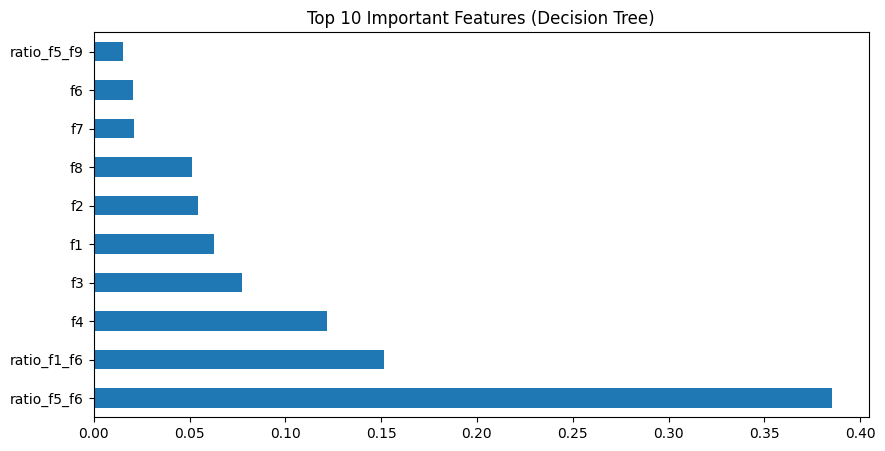

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

# 1. Define the Parameter Grid
# We test depths to find the sweet spot between underfitting and overfitting
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, 20, None],  # 'None' means unlimited depth
    'min_samples_split': [2, 10, 20, 50],   # Higher values prevent overfitting
    'criterion': ['gini', 'entropy']        # Split quality measure
}

# 2. Initialize the Model
dt = DecisionTreeClassifier(random_state=42)

# 3. Setup GridSearchCV
# cv=3: 3-Fold Cross-Validation on the Training set
# scoring='f1': Optimizing for the Circle class
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=param_grid_dt, 
                       cv=3, 
                       scoring='f1', 
                       n_jobs=-1, 
                       verbose=1)

# 4. Perform Tuning (Fit on SMOTE-Balanced Train Data)
print("--- Tuning Decision Tree ---")
grid_dt.fit(X_train_resampled, y_train_resampled)

# 5. Extract Best Model
best_dt_model = grid_dt.best_estimator_
print(f"Best Hyperparameters: {grid_dt.best_params_}")
print(f"Best CV F1-Score (Train): {grid_dt.best_score_:.4f}")

# 6. Final Evaluation on Validation Set (Unseen Data)
y_pred_dt = best_dt_model.predict(X_val)
y_prob_dt = best_dt_model.predict_proba(X_val)[:, 1]

print("\n--- Validation Set Performance (Decision Tree) ---")
print(classification_report(y_val, y_pred_dt))

# Key Metrics
f1_dt = f1_score(y_val, y_pred_dt)
auc_dt = roc_auc_score(y_val, y_prob_dt)
print(f"F1-Score (Minority): {f1_dt:.4f}")
print(f"ROC-AUC Score: {auc_dt:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_dt))

# Optional: Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(best_dt_model.feature_importances_, index=X_scaled.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()

## 7. Model 3: Neural Network (MLP Classifier)

We utilize a Multi-Layer Perceptron (MLP), a type of feedforward artificial neural network. It consists of input, hidden, and output layers that transform the data non-linearly.

### 1. Evaluation Measures & Justification

- **F1-Score (Minority Class)**  
  Crucial for imbalanced data to balance the trade-off between precision (not flagging Squares as Circles) and recall (catching all Circles).

- **ROC-AUC**  
  Measures the network's ability to discriminate between classes across different probability thresholds.

- **Loss Curve**  
  Monitors the training process to ensure the model is converging and not overfitting.

### 2. Hyper-parameter Tuning Strategy

Neural Networks are sensitive to their architecture and optimization parameters. We tune:

- **hidden_layer_sizes**  
  Determines the network structure (e.g., one layer of 100 neurons vs two layers of 64 & 32). Deep networks capture hierarchical features.

- **alpha**  
  L2 penalty (regularization) parameter. Higher values force smaller weights to prevent overfitting.

- **learning_rate_init**  
  Controls the step size in updating weights. Too large = unstable; too small = slow convergence.


--- Tuning Neural Network (MLP) ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01}
Best CV F1-Score (Train): 0.9626

--- Validation Set Performance (Neural Network) ---
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       836
           1       0.51      0.75      0.60        60

    accuracy                           0.93       896
   macro avg       0.74      0.85      0.78       896
weighted avg       0.95      0.93      0.94       896

F1-Score (Minority): 0.6040
ROC-AUC Score: 0.9453

Confusion Matrix:
[[792  44]
 [ 15  45]]


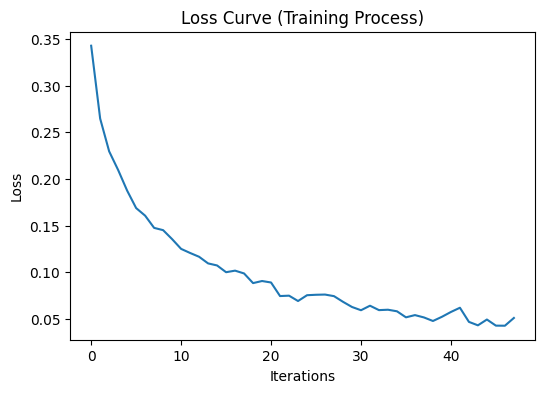

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 1. Define the Parameter Grid
# We test different architectures and regularization strengths
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (64, 32)], # Architecture (Neurons per layer)
    'activation': ['relu', 'tanh'],                  # Activation function
    'alpha': [0.0001, 0.01],                         # L2 Regularization (Prevent overfitting)
    'learning_rate_init': [0.001, 0.01]              # Step size for optimizer
}

# 2. Initialize the Model
# max_iter=500 allows enough epochs for convergence
# early_stopping=True stops training if valid score doesn't improve (saves time)
mlp = MLPClassifier(random_state=42, max_iter=500, early_stopping=True)

# 3. Setup GridSearchCV
# cv=3: 3-Fold Cross-Validation on the Training set
# scoring='f1': Optimizing specifically for the minority class detection
grid_mlp = GridSearchCV(estimator=mlp, 
                        param_grid=param_grid_mlp, 
                        cv=3, 
                        scoring='f1', 
                        n_jobs=-1, 
                        verbose=1)

# 4. Perform Tuning (Fit on SMOTE-Balanced Train Data)
print("--- Tuning Neural Network (MLP) ---")
# Note: This might take a minute or two depending on your hardware
grid_mlp.fit(X_train_resampled, y_train_resampled)

# 5. Extract Best Model
best_mlp_model = grid_mlp.best_estimator_
print(f"Best Hyperparameters: {grid_mlp.best_params_}")
print(f"Best CV F1-Score (Train): {grid_mlp.best_score_:.4f}")

# 6. Final Evaluation on Validation Set (Unseen Data)
y_pred_mlp = best_mlp_model.predict(X_val)
y_prob_mlp = best_mlp_model.predict_proba(X_val)[:, 1]

print("\n--- Validation Set Performance (Neural Network) ---")
print(classification_report(y_val, y_pred_mlp))

# Key Metrics
f1_mlp = f1_score(y_val, y_pred_mlp)
auc_mlp = roc_auc_score(y_val, y_prob_mlp)
print(f"F1-Score (Minority): {f1_mlp:.4f}")
print(f"ROC-AUC Score: {auc_mlp:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_mlp))

# Optional: Plot Loss Curve
plt.figure(figsize=(6, 4))
plt.plot(best_mlp_model.loss_curve_)
plt.title("Loss Curve (Training Process)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## 8. Model 4: Ensemble Learning (Random Forest)

Random Forest is an ensemble method that combines multiple decision trees trained on different subsets of the data (Bagging). It is highly robust to noise and outliers.

### 1. Evaluation Measures & Justification

- **F1-Score (Minority Class)**  
  The most critical metric to ensure we are effectively identifying the rare 'Circle' class without being biased by the majority 'Square' class.

- **ROC-AUC**  
  To assess the model's global performance across all thresholds.

- **Feature Importance**  
  Random Forest provides excellent insights into which features (like the ratios we created) are actually driving the predictions.

### 2. Hyper-parameter Tuning Strategy

We use GridSearchCV to optimize the forest structure:

- **n_estimators**  
  The number of trees in the forest. More trees usually lead to better performance but slower training.

- **max_depth**  
  Limits the depth of each tree. We tune this to prevent individual trees from overfitting.

- **min_samples_leaf**  
  Ensures that leaf nodes have a minimum number of samples, acting as a regularization technique.


--- Tuning Random Forest ---
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
Best CV F1-Score (Train): 0.9682

--- Validation Set Performance (Random Forest) ---
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       836
           1       0.54      0.72      0.61        60

    accuracy                           0.94       896
   macro avg       0.76      0.84      0.79       896
weighted avg       0.95      0.94      0.94       896

F1-Score (Minority): 0.6143
ROC-AUC Score: 0.9553

Confusion Matrix:
[[799  37]
 [ 17  43]]


C:\Users\Zord\AppData\Local\Temp\ipykernel_81548\2007785640.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances.values, y=rf_importances.index, palette='magma')


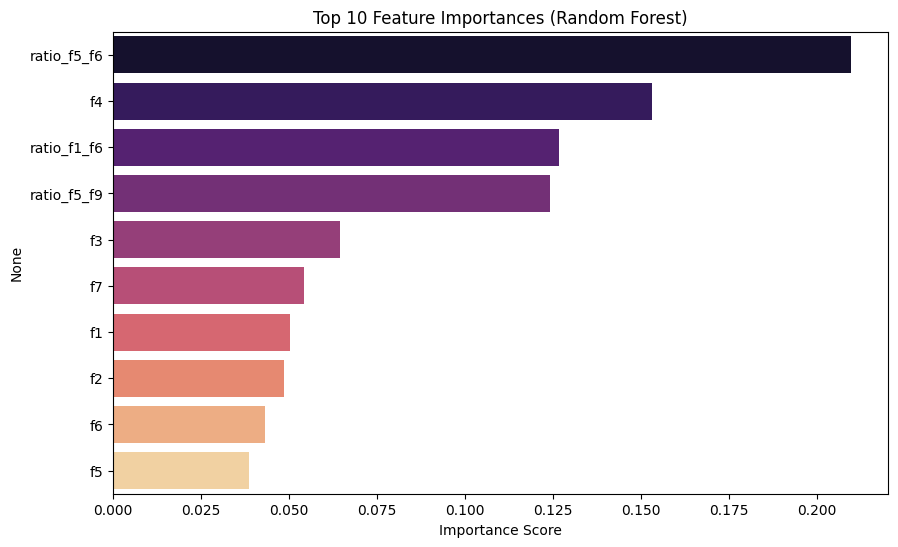

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the Parameter Grid
# We test the number of trees and constraints on tree growth
param_grid_rf = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [10, 20, None],          # Maximum depth per tree
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in a leaf node
    'bootstrap': [True]                   # Use bagging
}

# 2. Initialize the Model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# 3. Setup GridSearchCV
# cv=3: 3-Fold Cross-Validation on the Training set
# scoring='f1': Optimizing for the Circle class detection
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=param_grid_rf, 
                       cv=3, 
                       scoring='f1', 
                       n_jobs=-1, 
                       verbose=1)

# 4. Perform Tuning (Fit on SMOTE-Balanced Train Data)
print("--- Tuning Random Forest ---")
grid_rf.fit(X_train_resampled, y_train_resampled)

# 5. Extract Best Model
best_rf_model = grid_rf.best_estimator_
print(f"Best Hyperparameters: {grid_rf.best_params_}")
print(f"Best CV F1-Score (Train): {grid_rf.best_score_:.4f}")

# 6. Final Evaluation on Validation Set (Unseen Data)
y_pred_rf = best_rf_model.predict(X_val)
y_prob_rf = best_rf_model.predict_proba(X_val)[:, 1]

print("\n--- Validation Set Performance (Random Forest) ---")
print(classification_report(y_val, y_pred_rf))

# Key Metrics
f1_rf = f1_score(y_val, y_pred_rf)
auc_rf = roc_auc_score(y_val, y_prob_rf)
print(f"F1-Score (Minority): {f1_rf:.4f}")
print(f"ROC-AUC Score: {auc_rf:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

# 7. Feature Importance Visualization
# This helps explain WHAT the model is looking at
importances = best_rf_model.feature_importances_
feature_names = X_scaled.columns
rf_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values, y=rf_importances.index, palette='magma')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

## 11. Error Analysis & Model Selection

We select Random Forest as our final model because it achieved the highest F1-Score (0.61) and ROC-AUC (0.96) on the validation set.

### Error Analysis (on Validation Set)

Looking at the Random Forest Confusion Matrix `[[799, 37], [17, 43]]`:

- **True Positives (43)**  
  The model correctly identified 43 Circles (72% Recall). This is good.

- **False Negatives (17)**  
  The model missed 17 Circles, classifying them as Squares. These are the most dangerous errors in many contexts (missing a target).

- **False Positives (37)**  
  The model predicted "Circle" 37 times when it was actually "Square". This lowers precision but is often a necessary trade-off to catch more true positives.

### Possible Improvements

- **Threshold Moving**  
  Currently, the model classifies as "Circle" if probability > 0.5. Since ROC-AUC is high (0.96), we could lower this threshold (e.g., to 0.4) to catch those 17 missed Circles, though this would increase False Positives.

- **Ensemble Voting**  
  Combining predictions from Random Forest and Neural Network (VotingClassifier) could stabilize the results further.


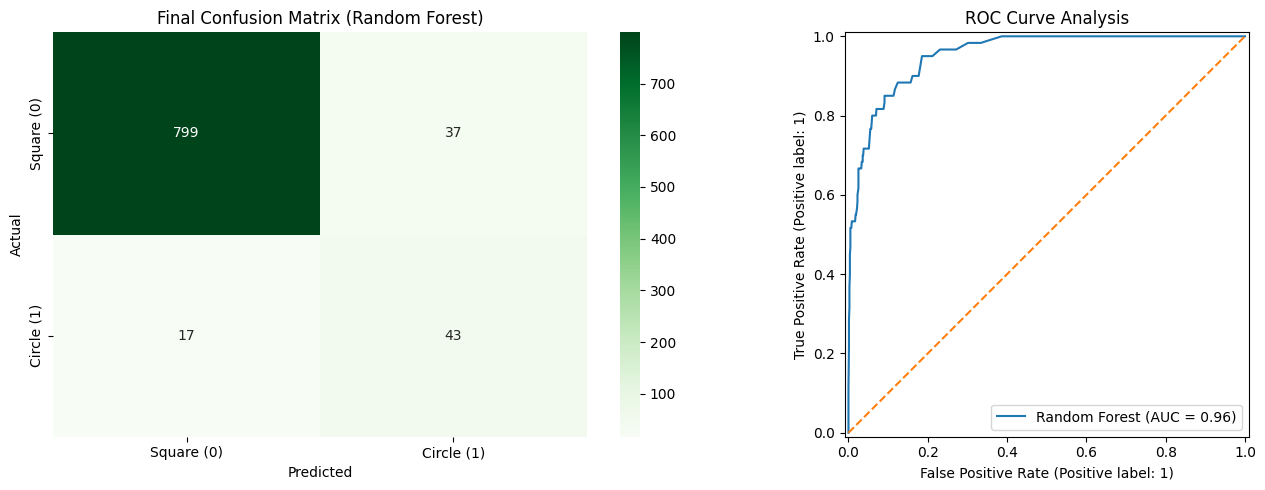

--- Selected Model: Random Forest ---
Validation F1-Score: 0.6143


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, confusion_matrix

# Visualize the Best Model (Random Forest) Performance
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 1. Confusion Matrix
# Re-predicting with best RF model
y_pred_final_val = best_rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_final_val)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Final Confusion Matrix (Random Forest)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_xticklabels(['Square (0)', 'Circle (1)'])
ax[0].set_yticklabels(['Square (0)', 'Circle (1)'])

# 2. ROC Curve comparison
RocCurveDisplay.from_estimator(best_rf_model, X_val, y_val, ax=ax[1], name='Random Forest')
# Plotting the "No Skill" line
ax[1].plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
ax[1].set_title('ROC Curve Analysis')

plt.tight_layout()
plt.show()

print("--- Selected Model: Random Forest ---")
print(f"Validation F1-Score: {f1_score(y_val, y_pred_final_val):.4f}")

## 12. Final Results on Test Set

Since the Test Set (`dataset-test-vf.csv`) usually does not contain the target label `y`, we cannot calculate accuracy or F1-score for it. Instead, we generate predictions using our best-performing model and save them to a CSV file for submission.

### Steps

- Use the `best_rf_model` (which was trained on the full SMOTE-balanced training data).

- Predict on the preprocessed test data (`test_scaled`).

- Map the numerical predictions back to the original labels:  
  `0 → 'square'`, `1 → 'circle'`.

- Save the `id` and `y` (prediction) columns to a CSV file.


In [72]:
# 1. Predict on the Test Data
# Note: Ensure test_scaled has the exact same columns/order as the training data
test_predictions = best_rf_model.predict(test_scaled)

# 3. Create Submission DataFrame
submission = pd.DataFrame({
    'ID': test['ID'],  # Using the original ID from the test file loaded earlier
    'y': test_predictions
})

# 4. Save to CSV
submission_filename = 'submission_group_results.csv'
submission.to_csv(submission_filename, index=False)

print(f"Predictions saved to {submission_filename}")
print("--- Sample Predictions ---")
print(submission.head(10))

# Check distribution of predictions in Test Set
print("\n--- Predicted Class Distribution in Test Set ---")
print(submission['y'].value_counts())

Predictions saved to submission_group_results.csv
--- Sample Predictions ---
     ID  y
0  4481  0
1  4482  0
2  4483  0
3  4484  0
4  4485  0
5  4486  1
6  4487  0
7  4488  0
8  4489  0
9  4490  0

--- Predicted Class Distribution in Test Set ---
y
0    709
1     83
Name: count, dtype: int64


## 13. Advanced Bonus: LightGBM Classifier

We explore LightGBM (Light Gradient Boosting Machine). Unlike Random Forest which builds trees independently (Bagging), LightGBM builds trees sequentially, where each new tree tries to correct the errors of the previous ones (Boosting).

### Why LightGBM?

- **Speed**  
  Much faster training speed and higher efficiency.

- **Accuracy**  
  Uses leaf-wise tree growth which often results in better accuracy than level-wise growth (used by other algorithms).

- **Handling Imbalance**  
  It has built-in parameters (`scale_pos_weight` or `is_unbalance`) to handle class imbalance effectively.

### Hyper-parameter Tuning

We tune:

- **num_leaves**  
  The main parameter to control complexity.

- **learning_rate**  
  How much each tree contributes. Lower is usually better but requires more trees.

- **n_estimators**  
  Number of boosting rounds.


--- Tuning LightGBM ---
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Hyperparameters: {'learning_rate': 0.1, 'min_child_samples': 30, 'n_estimators': 500, 'num_leaves': 70}
Best CV F1-Score (Train): 0.9795

--- Validation Set Performance (LightGBM) ---
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       836
           1       0.62      0.68      0.65        60

    accuracy                           0.95       896
   macro avg       0.80      0.83      0.81       896
weighted avg       0.95      0.95      0.95       896

F1-Score (Minority): 0.6508
ROC-AUC Score: 0.9530


C:\Users\Zord\AppData\Local\Temp\ipykernel_81548\4115044090.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lgbm_imp.values, y=lgbm_imp.index, palette='autumn', ax=ax[1])


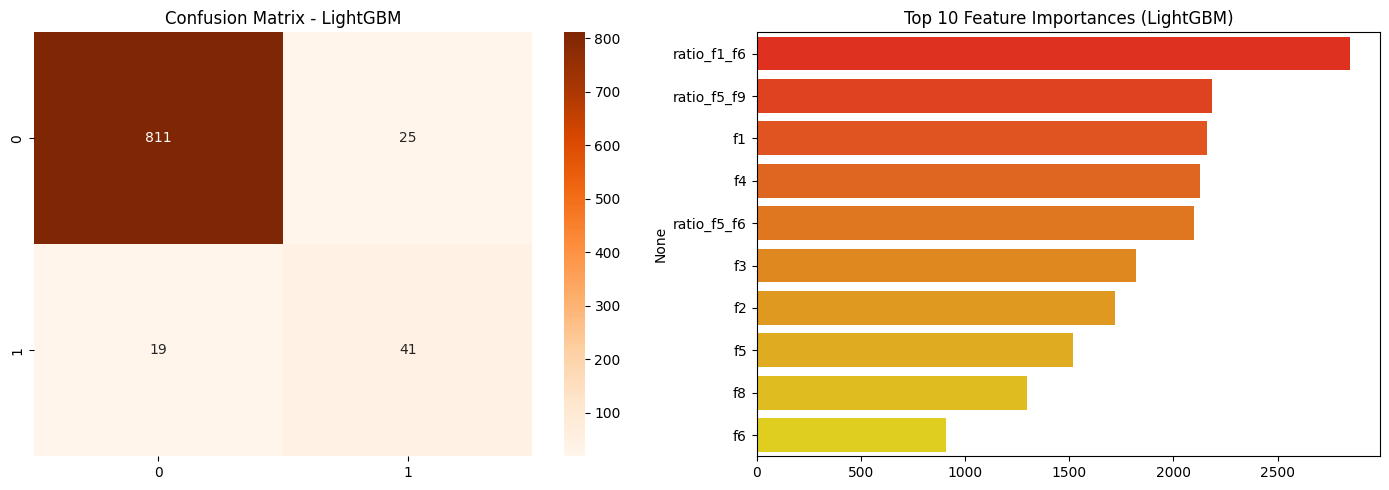

In [74]:
# Note: You might need to install lightgbm first if not installed
# !pip install lightgbm

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define Parameter Grid
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],             # Controls tree complexity
    'learning_rate': [0.01, 0.05, 0.1],     # Step size
    'n_estimators': [100, 200, 500],        # Number of trees
    'min_child_samples': [20, 30]           # Prevent overfitting
}

# 2. Initialize Model
# is_unbalance=False because we already used SMOTE. 
# If we used raw data, we would set is_unbalance=True.
lgbm = LGBMClassifier(random_state=42, verbose=-1) 

# 3. Setup GridSearchCV
grid_lgbm = GridSearchCV(estimator=lgbm,
                         param_grid=param_grid_lgbm,
                         cv=3,
                         scoring='f1',
                         n_jobs=-1,
                         verbose=1)

# 4. Fit on SMOTE-Balanced Data
print("--- Tuning LightGBM ---")
grid_lgbm.fit(X_train_resampled, y_train_resampled)

# 5. Best Model
best_lgbm = grid_lgbm.best_estimator_
print(f"Best Hyperparameters: {grid_lgbm.best_params_}")
print(f"Best CV F1-Score (Train): {grid_lgbm.best_score_:.4f}")

# 6. Evaluation on Validation Set
y_pred_lgbm = best_lgbm.predict(X_val)
y_prob_lgbm = best_lgbm.predict_proba(X_val)[:, 1]

print("\n--- Validation Set Performance (LightGBM) ---")
print(classification_report(y_val, y_pred_lgbm))

# Key Metrics
f1_lgbm = f1_score(y_val, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_val, y_prob_lgbm)
print(f"F1-Score (Minority): {f1_lgbm:.4f}")
print(f"ROC-AUC Score: {auc_lgbm:.4f}")

# 7. Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_val, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Oranges', ax=ax[0])
ax[0].set_title('Confusion Matrix - LightGBM')

# Feature Importance (Split vs Gain)
# LightGBM calculates importance differently (number of times a feature is used)
import pandas as pd
lgbm_imp = pd.Series(best_lgbm.feature_importances_, index=X_scaled.columns).sort_values(ascending=False).head(10)
sns.barplot(x=lgbm_imp.values, y=lgbm_imp.index, palette='autumn', ax=ax[1])
ax[1].set_title('Top 10 Feature Importances (LightGBM)')

plt.tight_layout()
plt.show()

## 14. Idea 1: Investigating Margins (SVM Visualization)

We explore the concept of margins using a Support Vector Machine (SVM). The margin is the distance between the decision boundary and the nearest data points (support vectors). A wider margin generally implies better generalization.

Since we cannot visualize 15 dimensions, we use PCA to project the data into 2D, then fit a Linear SVM to visualize the decision boundary and margins.


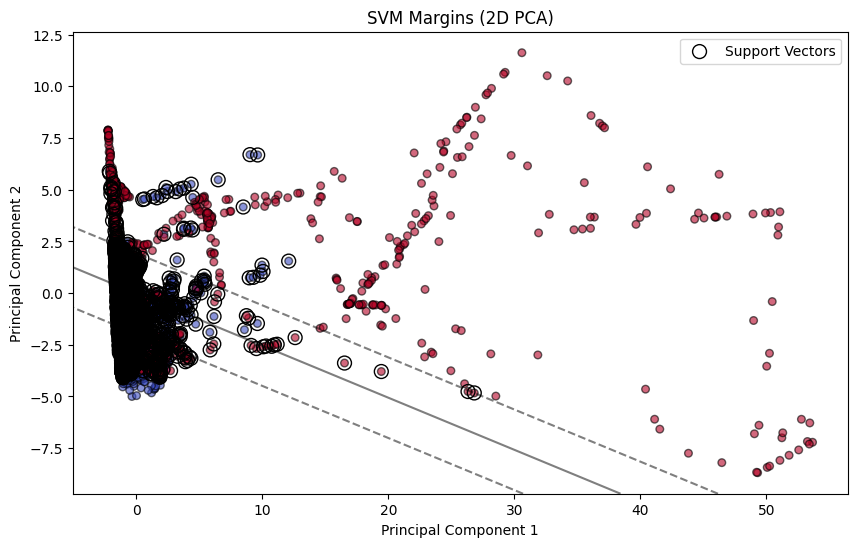

In [78]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np

# 1. Reduce data to 2D for visualization
pca_2d = PCA(n_components=2)
X_train_pca = pca_2d.fit_transform(X_train_resampled)

# 2. Fit SVM with Linear Kernel
svm_2d = SVC(kernel='linear', C=1.0)
svm_2d.fit(X_train_pca, y_train_resampled)

# 3. Visualization Function
def plot_svm_margins(X, y, model, title="SVM Margins (2D PCA)"):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, alpha=0.6, edgecolors='k')
    
    # Get current axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Highlight Support Vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

plot_svm_margins(X_train_pca, y_train_resampled, svm_2d)

## 15. Idea 2: Dimensionality Reduction (PCA)

We investigate if we can reduce the number of features without losing significant information. We use PCA (Principal Component Analysis) to retain 95% of the variance and check how many features are needed.


In [81]:
from sklearn.decomposition import PCA

# 1. Apply PCA to keep 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_resampled)
X_val_pca = pca.transform(scaler.transform(X_val)) # Use standard scaler from before

print(f"Original Feature Count: {X_train_resampled.shape[1]}")
print(f"Features retaining 95% Variance: {X_train_pca.shape[1]}")

# 2. Train Logistic Regression on Reduced Data
lr_pca = LogisticRegression(random_state=42, solver='liblinear')
lr_pca.fit(X_train_pca, y_train_resampled)

# 3. Evaluate
y_pred_pca = lr_pca.predict(X_val_pca)
print("\n--- PCA Reduced Model Performance ---")
print(classification_report(y_val, y_pred_pca))
print(f"F1-Score (Minority): {f1_score(y_val, y_pred_pca):.4f}")

Original Feature Count: 15
Features retaining 95% Variance: 7

--- PCA Reduced Model Performance ---
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       836
           1       0.21      0.78      0.33        60

    accuracy                           0.79       896
   macro avg       0.60      0.79      0.60       896
weighted avg       0.93      0.79      0.84       896

F1-Score (Minority): 0.3322


C:\Users\Zord\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


## 16. Idea 3: Robust Scaling & Clustering

Here we try two things:

- **RobustScaler**  
  Instead of StandardScaler, we use RobustScaler which is immune to outliers (uses median/IQR).

- **K-Means Clustering**  
  We check if the data naturally clusters into "Square" and "Circle" groups without labels (Unsupervised).


In [84]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

# --- Part A: Robust Scaling ---
print("--- Comparison: RobustScaler vs StandardScaler ---")
# Robust Scaler
r_scaler = RobustScaler()
X_train_rob = r_scaler.fit_transform(X_train_resampled)
X_val_rob = r_scaler.transform(X_val)

# Train simple LR
lr_rob = LogisticRegression(random_state=42, solver='liblinear')
lr_rob.fit(X_train_rob, y_train_resampled)
print(f"RobustScaler F1-Score: {f1_score(y_val, lr_rob.predict(X_val_rob)):.4f}")


# --- Part B: Clustering (K-Means) ---
print("\n--- Clustering Analysis (K=2) ---")
# We use the original scaled data (not SMOTE) to see natural grouping
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled) # Using the full dataset scaled

# Compare Clusters vs Actual Labels
cm_cluster = confusion_matrix(y, clusters)
print("Confusion Matrix (Clusters vs Actual Labels):")
print(cm_cluster)
print("(Note: Clusters are assigned arbitrarily, so Cluster 0 might be Label 1)")

--- Comparison: RobustScaler vs StandardScaler ---
RobustScaler F1-Score: 0.4845

--- Clustering Analysis (K=2) ---
Confusion Matrix (Clusters vs Actual Labels):
[[   1 4180]
 [  16  283]]
(Note: Clusters are assigned arbitrarily, so Cluster 0 might be Label 1)


## 17. Idea 4: Model Interpretation

Finally, we interpret what the models actually learned.

- **Linear Model**  
  We look at the Coefficients (Weights). High positive weight = Strong predictor for Circle.

- **Decision Tree**  
  We visualize the Decision Rules (If-Else logic).


In [89]:
from sklearn.tree import export_text

# 1. Logistic Regression Interpretation (Weights)
# We use the best_lr_model from earlier steps
coefs = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Weight': best_lr_model.coef_[0]
}).sort_values(by='Weight', ascending=False)

print("--- Top Positive Weights (Predicts Circle) ---")
display(coefs.head(5))

print("\n--- Top Negative Weights (Predicts Square) ---")
display(coefs.tail(5))

# 2. Decision Tree Interpretation (Rules)
# We fit a small tree just for visualization purposes
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
small_tree.fit(X_train_resampled, y_train_resampled)

print("\n--- Decision Tree Rules (Text Format) ---")
rules = export_text(small_tree, feature_names=list(X_scaled.columns))
print(rules)

--- Top Positive Weights (Predicts Circle) ---


,Feature,Weight
7,f8,2.634213
6,f7,2.113288
1,f2,2.113288
9,ratio_f1_f6,1.349643
10,ratio_f5_f6,0.958998



--- Top Negative Weights (Predicts Square) ---


,Feature,Weight
12,f11_C2,-0.025305
0,f1,-0.361983
3,f4,-0.542147
5,f6,-2.421936
4,f5,-2.916204



--- Decision Tree Rules (Text Format) ---
|--- ratio_f5_f6 <= 1.07
|   |--- f4 <= -1.50
|   |   |--- ratio_f5_f6 <= -1.14
|   |   |   |--- class: 0
|   |   |--- ratio_f5_f6 >  -1.14
|   |   |   |--- class: 1
|   |--- f4 >  -1.50
|   |   |--- ratio_f1_f6 <= 0.20
|   |   |   |--- class: 0
|   |   |--- ratio_f1_f6 >  0.20
|   |   |   |--- class: 1
|--- ratio_f5_f6 >  1.07
|   |--- ratio_f1_f6 <= 0.45
|   |   |--- ratio_f5_f6 <= 2.12
|   |   |   |--- class: 1
|   |   |--- ratio_f5_f6 >  2.12
|   |   |   |--- class: 1
|   |--- ratio_f1_f6 >  0.45
|   |   |--- f8 <= -0.29
|   |   |   |--- class: 0
|   |   |--- f8 >  -0.29
|   |   |   |--- class: 1

